<a href="https://colab.research.google.com/github/UdayLab/geoanalytics/blob/main/tests/patternMining/test_FrequentPatternMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Necessary Ubuntu packages

In [ ]:
# Installing necessary modules
!apt update
!apt install -y nco cdo gdal-bin
!which ncrename
!which cdo
!which gdal_translate

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,249 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,776 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,986 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubun

# Installing geoanalytics package

In [ ]:
!pip install -U geoanalytics

# Knowing the information of geoanalytics package

In [ ]:
pip show geoanalytics

Name: geoanalytics
Version: 2025.6.12.3
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/UdayLab/geoanalytics
Author: 
Author-email: Rage Uday Kiran <uday.rage@gmail.com>
License: GPLv3
Location: /usr/local/lib/python3.11/dist-packages
Requires: deprecated, discord.py, fastparquet, matplotlib, mplcursors, networkx, numba, numpy, pami, pandas, Pillow, plotly, psutil, psycopg2-binary, rasterio, resource, scikit-learn, shapely, sphinx, sphinx-rtd-theme, tqdm, urllib3, validators
Required-by: 


# Download any dataset with extension of both .img and .lbl from the below link

Link --> https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/

Example Direction : --> https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/



## Use !wget command to download the `.img` and `.lbl` files

In [ ]:
# Download any files by using the wget command
!wget https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.img

--2025-06-14 08:53:11--  https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.img
Resolving data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)... 159.60.133.108
Connecting to data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)|159.60.133.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92274688 (88M) [application/octet-stream]
Saving to: ‘MI_MAP_03_S16E035S17E036SC.img’

MI_MAP_03_S16E035S1 100%[===================>]  88.00M   187KB/s    in 8m 19s  

2025-06-14 09:01:31 (181 KB/s) - ‘MI_MAP_03_S16E035S17E036SC.img’ saved [92274688/92274688]



In [ ]:
!wget https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.lbl

--2025-06-14 09:01:31--  https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.lbl
Resolving data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)... 159.60.133.108
Connecting to data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)|159.60.133.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12155 (12K)
Saving to: ‘MI_MAP_03_S16E035S17E036SC.lbl’

MI_MAP_03_S16E035S1 100%[===================>]  11.87K  45.2KB/s    in 0.3s    

2025-06-14 09:01:32 (45.2 KB/s) - ‘MI_MAP_03_S16E035S17E036SC.lbl’ saved [12155/12155]



# **Operatioin 1: Raster to CSV**

## ***Step1: Import RasterToTSV package from geoAnalytics.conversion***

In [ ]:
# Import Raster To TSV package
from geoanalytics.conversion import Raster2CSV

## ***Step2: Pass the lbl file as input and give desired outputFile name also specify the inputband value as well as ouput band value***

In [ ]:
# Specify startBand = 1
# Specify endBand = 9
converter = Raster2CSV.Raster2CSV(inputFile='MI_MAP_03_S16E035S17E036SC.lbl', outputFile='Moon.csv', startBand=1, endBand=9)

## ***Step3: Convert the raster file into a CSV file***

In [ ]:
# convert using run() method
converter.run()

Processing: MI_MAP_03_S16E035S17E036SC.lbl
Done. Output saved to: Moon.csv


# **Operation 2: Dataframe to Database**

In [ ]:
# Install PAMI library for Pattern Mining
!pip install PAMI

## ***Step 1: Read the converted CSV file as a Dataframe***

In [ ]:
import pandas as pd
df = pd.read_csv('Moon.csv', sep='\t')
df

,x,y,1,2,3,4,5,6,7,8,9
0,1061317.265,-485173.607,1928,3446,3859,3913,4026,3999,4236,5245,6513
1,1061332.071,-485173.607,1924,3480,3876,3930,4059,3996,4243,5234,6518
2,1061346.877,-485173.607,1904,3476,3834,3923,4047,3992,4238,5222,6523
3,1061361.684,-485173.607,1874,3452,3801,3897,3959,3988,4228,5210,6518
4,1061376.490,-485173.607,1907,3464,3777,3868,3974,3983,4218,5198,6504
...,...,...,...,...,...,...,...,...,...,...,...
4194299,1091566.583,-515482.151,2090,3719,4007,3996,4117,4056,4310,5374,6633
4194300,1091581.390,-515482.151,2098,3734,4038,4020,4177,4083,4327,5389,6659
4194301,1091596.196,-515482.151,2114,3767,4046,4040,4213,4110,4332,5393,6685
4194302,1091611.002,-515482.151,2123,3813,4019,4056,4214,4136,4331,5397,6711


### Reducing the size of our dataframe
### Because it will consume a lot of time and memory

In [ ]:
# Select only the first 1000 pixels in the Raster File
df = df.iloc[:1000,:]

## ***Step 2: Converting Raster Dataframe into a Database***

### ***Step 2.1: Import RasterDF2DB from geoanalytics.conversion***

In [ ]:
from geoanalytics.conversion import RasterDF2DB

In [ ]:
# Pass the dataframe as input dataframe
obj = RasterDF2DB.RasterDF2DB(dataframe=df)

### ***Step 2.2: Prepare the Transactional Dataframe***

In [ ]:
obj.prepareTransactionalDataframe()

Prepared transactional DataFrame: (9, 1000)


### ***Step 2.3: Give the desired output DBname and condition along with thresholdValue***

In [ ]:
# Select the pixels which has their band value more than or equal to 4000
obj.convertToTransactionalDB(DBname='transactionalDB.csv', condition='>=', thresholdValue=4000)

Saved transaction DB to: transactionalDB.csv


#### **Print the head of the Transactional Database**

In [ ]:
!head transactionalDB.csv

POINT(1068542.75,-485173.607)	POINT(1068557.557,-485173.607)	POINT(1068572.363,-485173.607)	POINT(1068587.169,-485173.607)	POINT(1072718.134,-485173.607)	POINT(1072732.94,-485173.607)	POINT(1072747.746,-485173.607)	POINT(1072762.553,-485173.607)	POINT(1072777.359,-485173.607)	POINT(1072792.165,-485173.607)	POINT(1072806.972,-485173.607)	POINT(1072821.778,-485173.607)
POINT(1061998.355,-485173.607)	POINT(1062013.162,-485173.607)	POINT(1065152.102,-485173.607)	POINT(1066010.869,-485173.607)	POINT(1066099.707,-485173.607)	POINT(1066114.513,-485173.607)	POINT(1067091.731,-485173.607)	POINT(1067106.537,-485173.607)	POINT(1067121.343,-485173.607)	POINT(1067136.15,-485173.607)	POINT(1067195.375,-485173.607)	POINT(1068305.849,-485173.607)	POINT(1068320.656,-485173.607)	POINT(1068335.462,-485173.607)	POINT(1068350.268,-485173.607)	POINT(1068365.074,-485173.607)	POINT(1068379.881,-485173.607)	POINT(1068394.687,-485173.607)	POINT(1068409.493,-485173.607)	POINT(1068424.3,-485173.607)	POINT(1068439

# **Operation 3: Frequent Pattern Mining**

## ***Step 1: Import the FrequentPatternMining from `geoanalytics.patternmining` .***

In [ ]:
from geoanalytics.patternMining import FrequentPatternMining

## ***Step 2: Pass the inputFile into the algorithm***

In [ ]:
alg = FrequentPatternMining.FrequentPatternMining(inputFile='transactionalDB.csv')

## ***Step 3: Show the database statistics to know the appropriate parameters to mine the patterns***

Database size (total no of transactions) : 8
Number of items : 1000
Minimum Transaction Size : 12
Average Transaction Size : 537.125
Maximum Transaction Size : 1000
Standard Deviation Transaction Size : 401.3674866939274
Variance in Transaction Sizes : 184109.55357142858
Sparsity : 0.462875


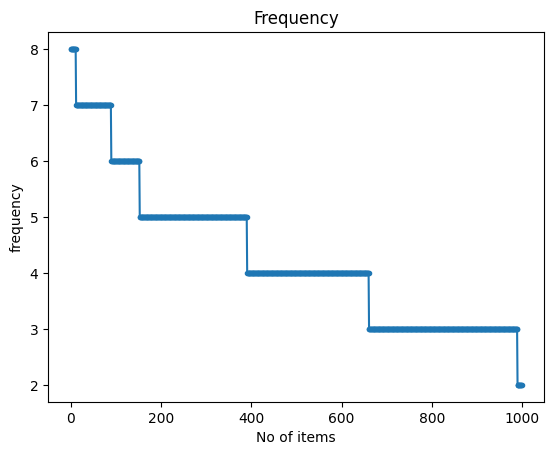

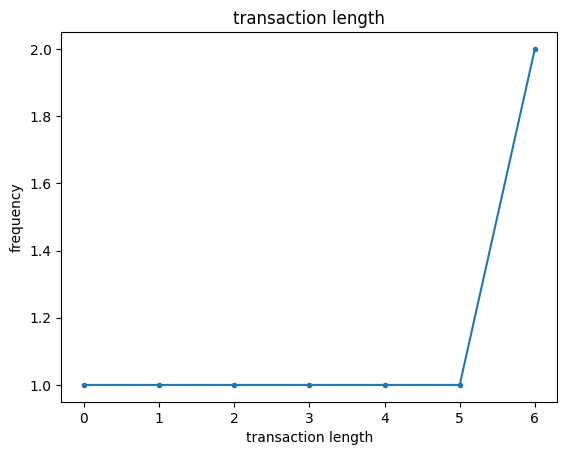

In [ ]:
# Get to know the database statistics and visualization of frequency and transaction length graphs
alg.showDBstats()

## ***Step 4: Specify the parameter `minSupport` to mine the patterns in database***

In [ ]:
# More Minimum Support --> less Patterns
# Less Minimum Support --> More Patterns
alg.run(minSupport=8)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 4095
Total Memory in USS: 667549696
Total Memory in RSS 688414720
Total ExecutionTime in ms: 0.007066011428833008


## ***Step 5: Save the patterns***

In [ ]:
alg.save(outputFile='FrequentPatterns.txt')

Frequent patterns saved to: FrequentPatterns.txt


#### **View the frequent patterns**

In [ ]:
!head FrequentPatterns.txt

POINT(1068542.75,-485173.607):8
POINT(1068557.557,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068557.557,-485173.607):8
POINT(1068572.363,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068572.363,-485173.607):8
POINT(1068557.557,-485173.607)	POINT(1068572.363,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068557.557,-485173.607)	POINT(1068572.363,-485173.607):8
POINT(1068587.169,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068587.169,-485173.607):8
POINT(1068557.557,-485173.607)	POINT(1068587.169,-485173.607):8
